# Detection of important genes through Clustering Coefficient

One aproach for grouping the genes was to calculate the most “important” genes in the network. There are several metrics to calculate the most important nodes in a network, in this case the metric used was the clustering coefficient. The clustering coefficient quantifies the degree to which nodes in a graph tend to cluster together. Once the clustering coefficient was calculated for each gene, only the genes with high clustering coefficient (clustering coefficient > threshold) were grouped.

The libraries used were [NetworkX](https://networkx.org/).

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

This program recieves as an input the name of the file of the network that we want to analyze.

In [2]:
namenet="Net_InterestFT_S"

In [3]:
df = pd.read_csv(namenet+".txt", sep='\t')

In [4]:
G = nx.from_pandas_edgelist(df,source="Regulator",target="Target")

### Compute the Clustering Coefficient

In [5]:
clust=nx.clustering(G)

In [6]:
threshold = 0.8

In [7]:
clustbin = dict()
for (key, value) in clust.items():
    if value > threshold:
        clustbin[key] = 1
    else:
        clustbin[key] = 0

In [8]:
clustercoefhigh = pd.DataFrame(clustbin.items())
clustercoefhigh = clustercoefhigh[clustercoefhigh.iloc[:,1] == 1]
clustercoefhigh.drop(1, axis=1, inplace=True)
clustercoefhigh.columns = ['nodes']

### The output file has this format:

In [9]:
clustercoefhigh.head()

,nodes
11,Solyc06g054490.2
34,Solyc11g011040.1
37,Solyc02g083880.2
43,Solyc06g005790.2
57,Solyc01g016470.2


Where the column "nodes" has the name of the genes that had a Clustering Coefficient higher than the threshold.

Then the file is saved.

In [10]:
clustercoefhigh.to_csv("Nodes_high_clust_coef "+nomred+".csv",index=False)

Compute the best spatial position in order to display the network.  

In [11]:
pos = nx.spring_layout(G)

#### Plot of the network

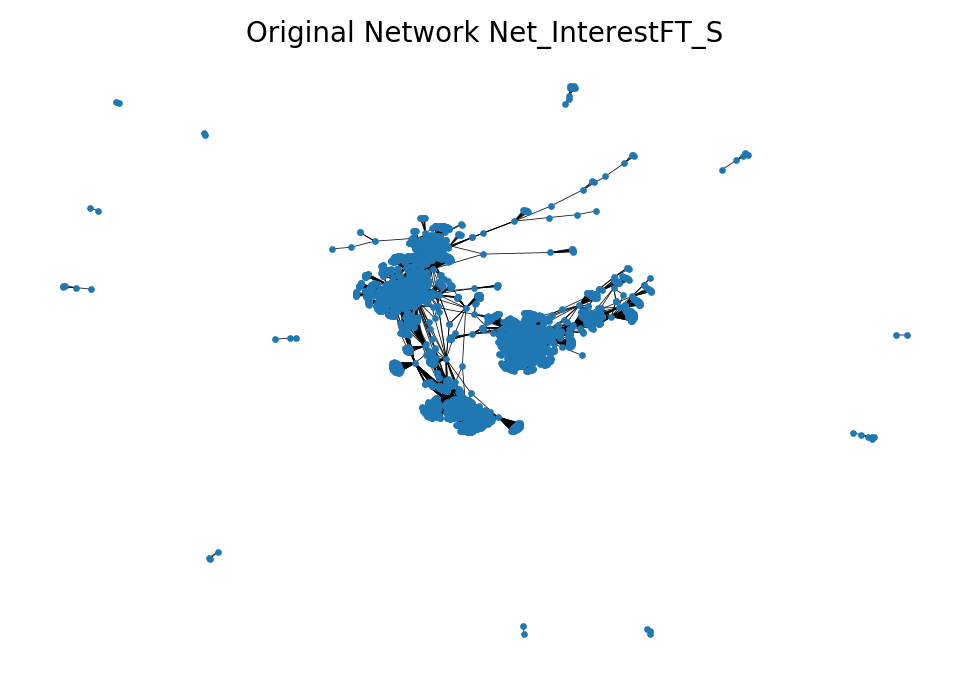

In [12]:
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 200 
fig, ax = plt.subplots()
ax.axis("off")
nx.draw_networkx_nodes(G, pos,node_size=2)
nx.draw_networkx_edges(G, pos, alpha=0.9,width=0.3,connectionstyle="arc3,rad=-0.3")
plt.title("Original Network "+namenet, fontsize=10)
plt.show()

#### Plot of the network with the nodes whith High Clustering Coefficient colored in pink.

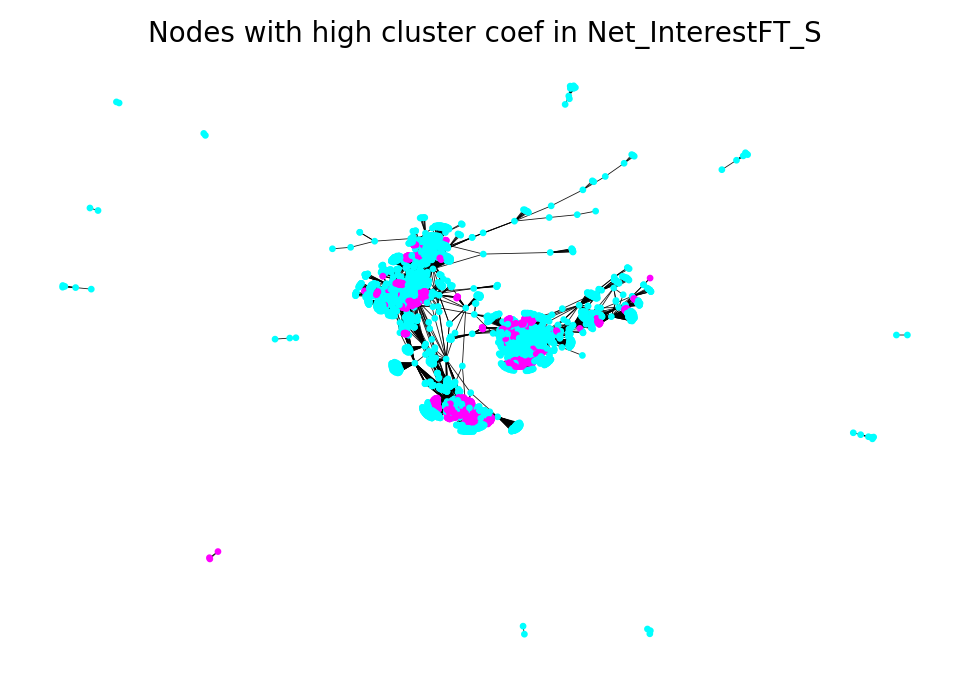

In [14]:
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 200 
fig, ax = plt.subplots()
ax.axis("off")
cmap = cm.get_cmap('cool', max(clustbin.values()) + 1)
nx.draw_networkx_nodes(G, pos, clustbin.keys(),
                       cmap=cmap,node_size=2, node_color=list(clustbin.values()))
nx.draw_networkx_edges(G, pos,connectionstyle='arc3,rad=-0.3', alpha=0.9,width=0.3)

plt.title("Nodes with high cluster coef in "+namenet, fontsize=10)
plt.show()